In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../../data/attrition.csv", index_col = 0)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,41,Yes,Travel_Rarely,1102,Sales,1,College,Life_Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
2,49,No,Travel_Frequently,279,Research_Development,8,Below_College,Life_Sciences,High,Male,...,Outstanding,Very_High,1,10,3,Better,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research_Development,2,College,Other,Very_High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
5,33,No,Travel_Frequently,1392,Research_Development,3,Master,Life_Sciences,Very_High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
7,27,No,Travel_Rarely,591,Research_Development,2,Below_College,Medical,Low,Male,...,Excellent,Very_High,1,6,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,884,Research_Development,23,College,Medical,High,Male,...,Excellent,High,1,17,3,Better,5,2,0,3
2062,39,No,Travel_Rarely,613,Research_Development,6,Below_College,Medical,Very_High,Male,...,Excellent,Low,1,9,5,Better,7,7,1,7
2064,27,No,Travel_Rarely,155,Research_Development,4,Bachelor,Life_Sciences,Medium,Male,...,Outstanding,Medium,1,6,0,Better,6,2,0,3
2065,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,Very_High,Male,...,Excellent,Very_High,0,17,3,Good,9,6,0,8


In [3]:
# After inspection, it turns out that every 'object' type(which represents str) could be converted to categorical
# In the get_dummies below, this is not necessary, because by default it encodes both categorical and objects.
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].astype('category')
df.dtypes

Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                   category
EducationField              category
EnvironmentSatisfaction     category
Gender                      category
HourlyRate                     int64
JobInvolvement              category
JobLevel                       int64
JobRole                     category
JobSatisfaction             category
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
OverTime                    category
PercentSalaryHike              int64
PerformanceRating           category
RelationshipSatisfaction    category
StockOptionLevel               int64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
WorkLifeBalance             category
Y

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
encoded_columns = [col for col in df.columns if df[col].dtype == "category" and col != "Attrition"]
df = pd.get_dummies(data = df, columns = encoded_columns, drop_first = True) # encode columns
df

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,...,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very_High,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
1,41,Yes,1102,1,94,2,5993,19479,8,11,...,0,1,1,0,1,0,0,0,0,0
2,49,No,279,8,61,2,5130,24907,1,23,...,1,0,0,1,0,0,1,0,1,0
4,37,Yes,1373,2,92,1,2090,2396,6,15,...,0,1,1,0,0,1,0,0,1,0
5,33,No,1392,3,56,1,2909,23159,1,11,...,1,0,1,0,0,0,0,0,1,0
7,27,No,591,2,40,1,3468,16632,9,12,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,884,23,41,2,2571,12290,4,17,...,1,0,0,0,0,0,0,0,1,0
2062,39,No,613,6,42,3,9991,21457,4,15,...,1,0,0,0,1,0,0,0,1,0
2064,27,No,155,4,87,2,6142,5174,1,20,...,1,0,1,1,0,1,0,0,1,0
2065,49,No,1023,2,63,2,5390,13243,2,14,...,1,0,0,0,0,0,1,0,0,1


In [6]:
random_seed = 42 # for reproducibility

In [7]:
# Create training (80%) and test (20%) sets
X = df.drop('Attrition', axis=1)  # Features (all columns except 'Attrition')
y = df['Attrition']  # Target variable ('Attrition' column)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = random_seed)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the SVM classifier and parameter grid for tuning
svm = SVC(kernel='rbf', random_state = random_seed)  # Radial basis function kernel
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=10)
grid_search.fit(X_train_scaled, y_train)

# Get the best SVM model
best_svm_model = grid_search.best_estimator_
best_svm_model

SVC(C=10, gamma=0.001, random_state=42)

In [10]:
# All results
pd.DataFrame(grid_search.cv_results_)[["param_C", "param_gamma", "mean_test_score"]]

,param_C,param_gamma,mean_test_score
0,0.1,0.1,0.838433
1,0.1,0.01,0.838433
2,0.1,0.001,0.838433
3,1,0.1,0.838433
4,1,0.01,0.863103
5,1,0.001,0.838433
6,10,0.1,0.838433
7,10,0.01,0.854650
8,10,0.001,0.877560


In [11]:
# If we care only about values of C, we could change the grid search values from above and rerun
param_grid = {'C': [0.25, 0.50, 1, 2, 4, 8, 16, 32, 64, 128]}
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=10)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid={'C': [0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128]})

In [12]:
# the grid_search.cv_results_ contains more stuff if someone wants to have a look
results_df = pd.DataFrame(grid_search.cv_results_)[["param_C", "mean_test_score"]]
results_df

,param_C,mean_test_score
0,0.25,0.838433
1,0.5,0.840142
2,1,0.863103
3,2,0.871607
4,4,0.862270
5,8,0.858880
6,16,0.858880
7,32,0.858880
8,64,0.858880
9,128,0.858880


Text(0, 0.5, 'Accuracy (cross-validation)')

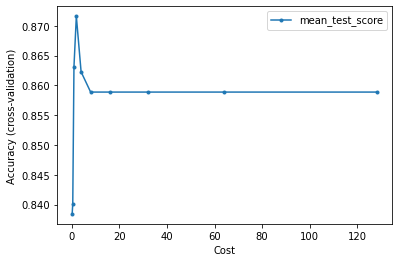

In [13]:
ax = results_df.plot(x = "param_C", y = "mean_test_score", marker = '.')
ax.set_xlabel("Cost")
ax.set_ylabel("Accuracy (cross-validation)")

In [14]:
### Different costs for missclassification
class_weights = {"No": 1, "Yes": 10} 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the SVM classifier and parameter grid for tuning
svm = SVC(kernel='rbf', random_state = random_seed)  # Radial basis function kernel
param_grid = {'C': [0.25, 0.50, 1, 2, 4, 8, 16, 32, 64, 128]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=10) # default is accuracy
# While fitting, give the custom class weights
grid_search.fit(X_train_scaled, y_train, sample_weight=[class_weights[label] for label in y_train]) # given as list

GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid={'C': [0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128]},
             scoring='roc_auc')

In [15]:
results_df = pd.DataFrame(grid_search.cv_results_)[["param_C", "mean_test_score"]]
results_df

,param_C,mean_test_score
0,0.25,0.814680
1,0.5,0.807522
2,1,0.802492
3,2,0.802551
4,4,0.805609
5,8,0.806403
6,16,0.805867
7,32,0.805867
8,64,0.805867
9,128,0.805867


In [16]:
from sklearn.metrics import confusion_matrix

y_pred = grid_search.best_estimator_.predict(X_train_scaled) # Get predictions from the best model
conf_matrix = confusion_matrix(y_train, y_pred)
conf_matrix

array([[800, 186],
       [  3, 187]], dtype=int64)

In [17]:
# Identify the order of the classes.
grid_search.classes_

array(['No', 'Yes'], dtype=object)

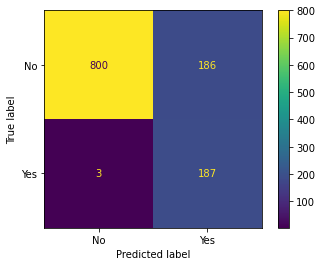

In [18]:
# Making the visualization of the confusion matrix better
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["No", "Yes"])
disp.plot()

In [19]:
# Model validation on the test set
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

test_validation = grid_search.best_estimator_.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, test_validation)
conf_matrix

array([[182,  65],
       [ 13,  34]], dtype=int64)

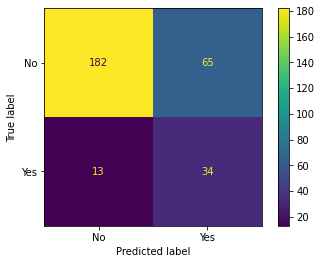

In [20]:
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["No", "Yes"])
disp.plot()